
## **Data Science and Business Analytics GRIP MAY21**


### **Task 4: Exploratory Data Analysis - Terrorism**

Problem: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

### Author: Kritika Misra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import datasets

# loading the dataset

import os
os.chdir("C:/Users/Kritika/Downloads/GRIP Stuff")
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1',dtype='unicode')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
df.shape

(181691, 135)

In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Condensing the number of columns to required and manageable amount

In [4]:
# renaming to readable names
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'AttackType','targtype1_txt':'Target','gname':'Group','motive':'Motive','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded'},inplace=True)
df= df[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Target','Group','Motive','WeaponType','Killed','Wounded','Summary']]
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Target,Group,Motive,WeaponType,Killed,Wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1,0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0,0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,NaN,Unknown,1,0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Target             0
Group              0
Motive        131130
WeaponType         0
Killed         10313
Wounded        16311
Summary        66129
dtype: int64

#### All the columns possessing null values (NaN) are those that have numerical descriptions. So we can replace all the NaN's with 0's instead

In [6]:
df['City']= df['City'].fillna(0)
df['Killed']= df['Killed'].fillna(0)
df['Latitude']= df['Latitude'].fillna(0)
df['Longitude']= df['Longitude'].fillna(0)
df['Motive']= df['Motive'].fillna(0)
df['Summary']= df['Summary'].fillna(0)
df['Wounded']= df['Wounded'].fillna(0)

In [7]:
df.duplicated().any() # check for duplicate entries

True

In [8]:
df.describe()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Target,Group,Motive,WeaponType,Killed,Wounded,Summary
count,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691
unique,47,13,32,205,12,36675,48323,48040,9,22,3537,14491,12,206,239,112493
top,2014,5,15,Iraq,Middle East & North Africa,Unknown,33.303566,44.371773,Bombing/Explosion,Private Citizens & Property,Unknown,0,Explosives,0,0,0
freq,16903,16875,6500,24636,50474,9775,7521,7521,88255,43511,82782,131130,92426,88149,103275,66129


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        181691 non-null  object
 1   Month       181691 non-null  object
 2   Day         181691 non-null  object
 3   Country     181691 non-null  object
 4   Region      181691 non-null  object
 5   City        181691 non-null  object
 6   Latitude    181691 non-null  object
 7   Longitude   181691 non-null  object
 8   AttackType  181691 non-null  object
 9   Target      181691 non-null  object
 10  Group       181691 non-null  object
 11  Motive      181691 non-null  object
 12  WeaponType  181691 non-null  object
 13  Killed      181691 non-null  object
 14  Wounded     181691 non-null  object
 15  Summary     181691 non-null  object
dtypes: object(16)
memory usage: 22.2+ MB


## Year wise attacks

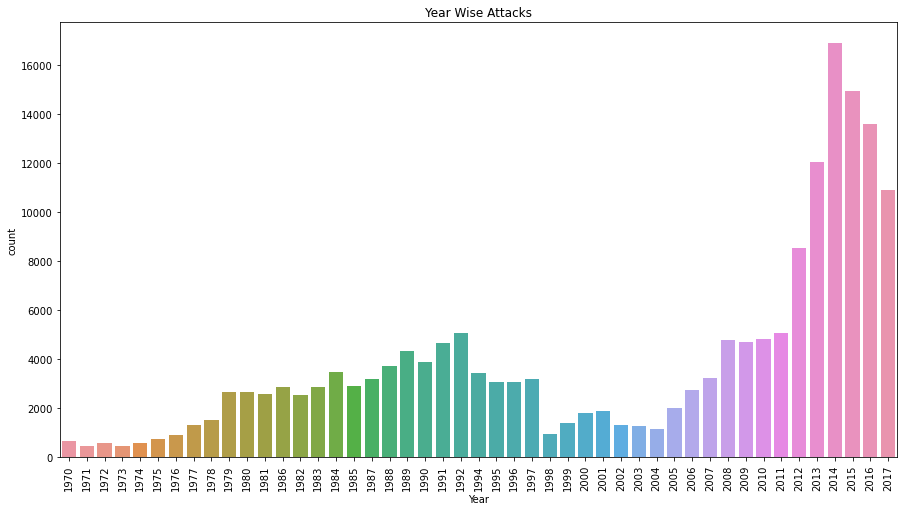

In [15]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(15,8))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.title("Year Wise Attacks")
plt.show()

### 2014, 2015 and 2016 saw the most attacks

## Region wise attacks

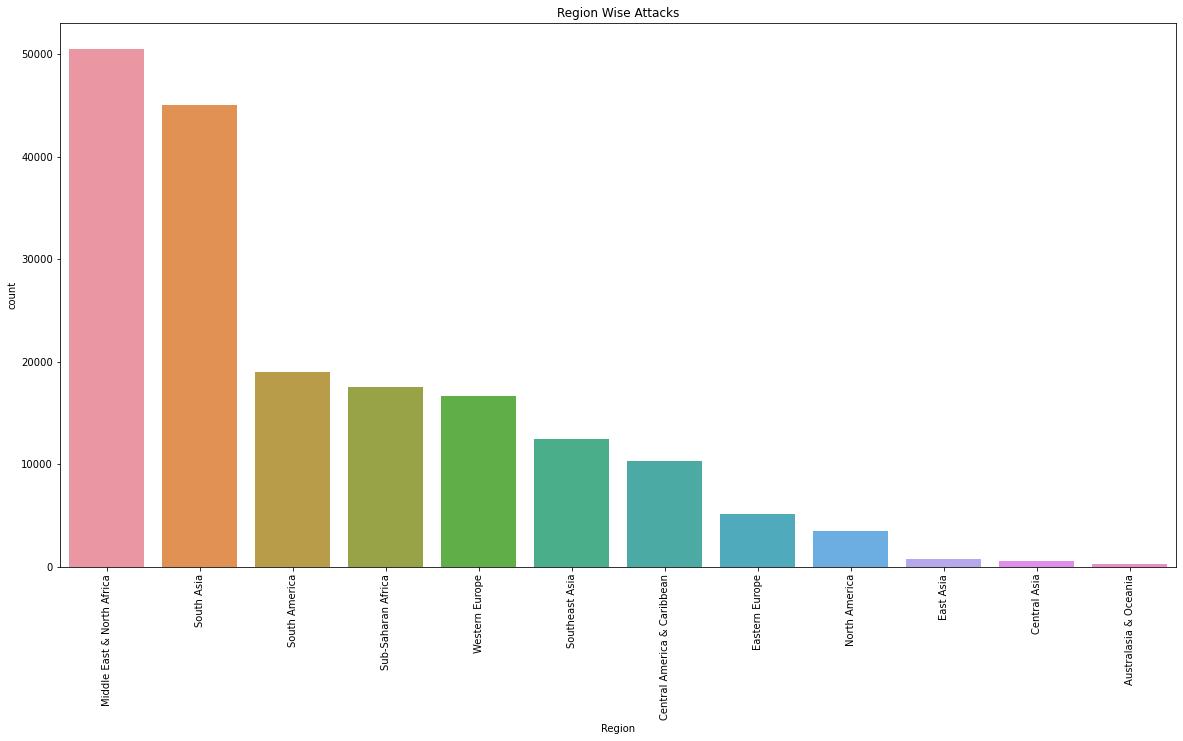

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x="Region", data=df, order = df["Region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Region Wise Attacks")
plt.show()

### Middle East & North Africa, as well as South Asia are the regions most affected by terrorism

## Countries with the most number of attacks

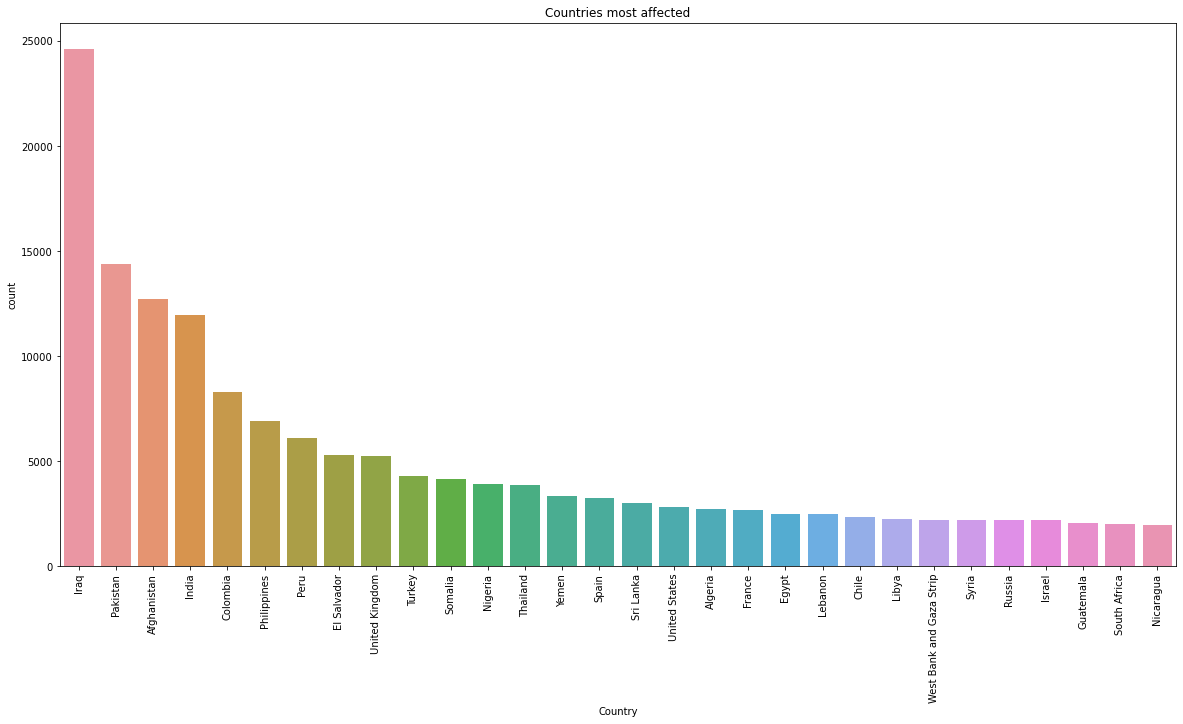

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x="Country", data=df, order = df["Country"].value_counts().head(30).index)
plt.xticks(rotation=90)
plt.title("Countries most attacked")
plt.show()

### Iraq sees the most terrorist activity, followed by Pakistan, Afghanistan and India

## Countries with the most number of people killed due to terrorist attacks

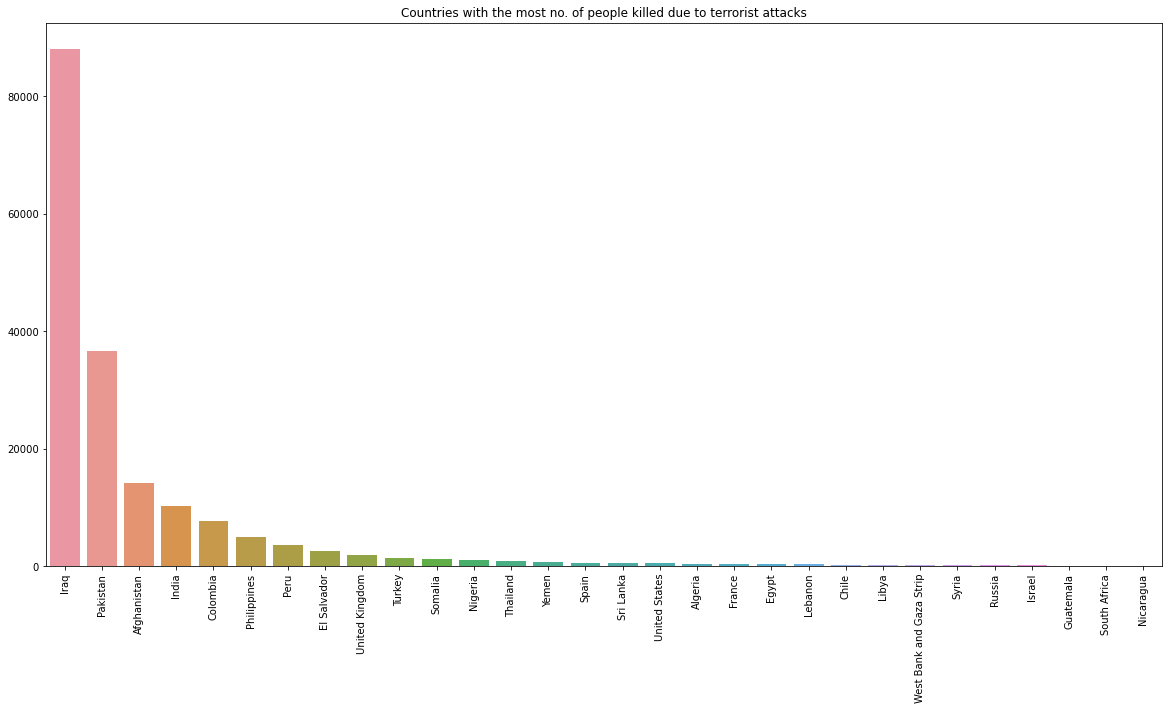

In [53]:
plt.figure(figsize=(20,10))
y=df["Country"].value_counts()[:30].index
x=df["Killed"].value_counts()[:30].values
sns.barplot(x=y, y=x)
plt.title("Countries with the most no. of people killed due to terrorist attacks")
plt.xticks(rotation=90)
plt.show()

### Understandably, the countries facing the most terrorist attacks have the highest casualties due to terrorism as well

## Most dangerous cities in the world by number of attacks

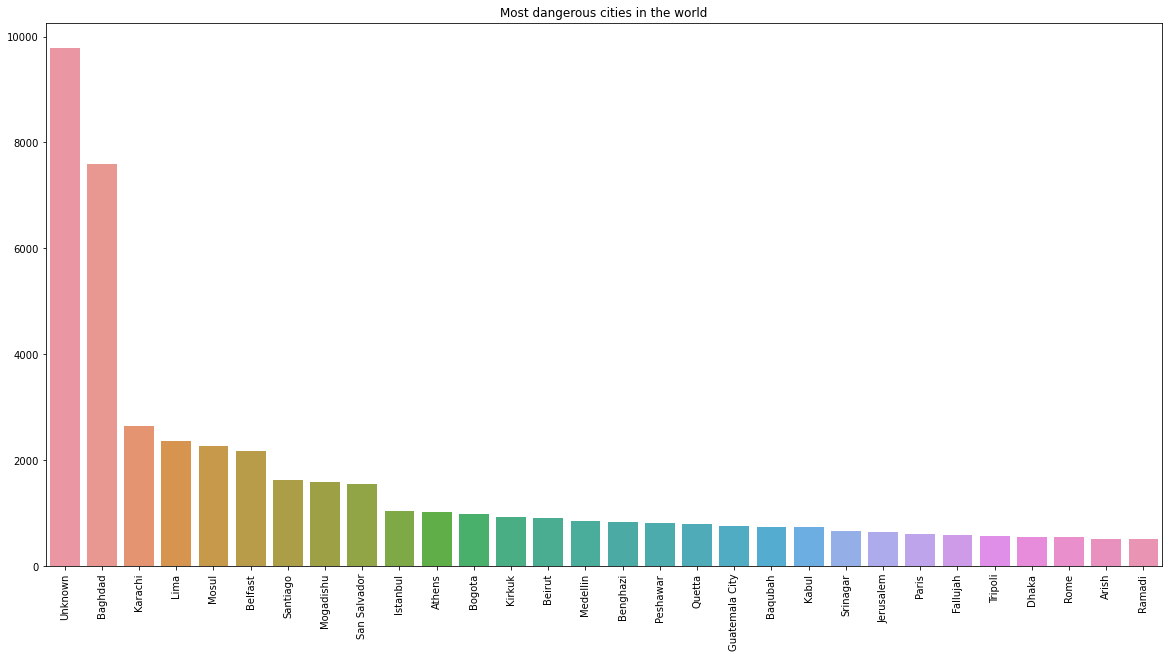

In [50]:
plt.figure(figsize=(20,10))
x = df['City'].value_counts().values[:30]
y = df['City'].value_counts().index[:30]
sns.barplot(x=y, y=x)
plt.xticks(rotation=90)
plt.title('Most dangerous cities in the world')
plt.show()

### Visibly, the country facing the most number of attacks, has the most dangerous city in the world (terrorist activity wise), namely, Baghdad

## Number of attacks per year across regions

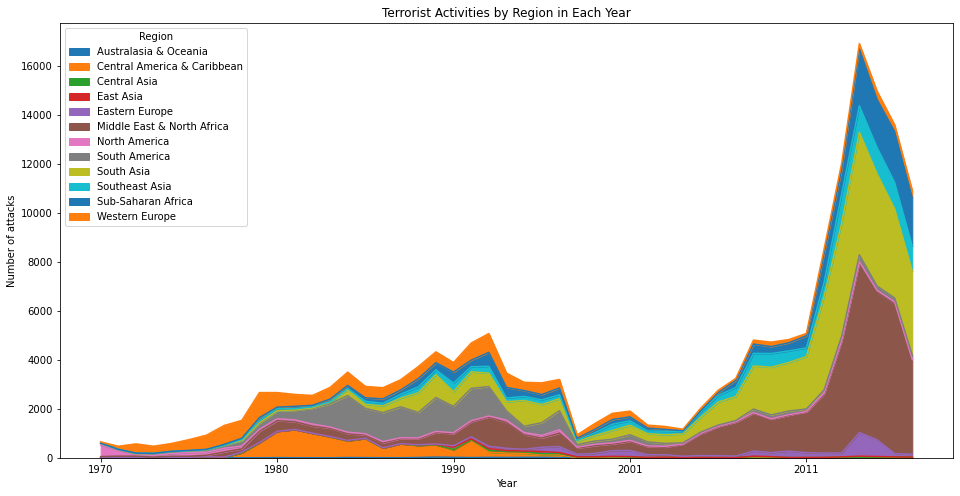

In [36]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(16,8))
plt.title('Terrorist Activities by Region in Each Year')
plt.ylabel('Number of attacks')
plt.show()

### 2011 onwards saw increased terrorist activity across multiple regions

## Number of attacks by attack type across regions

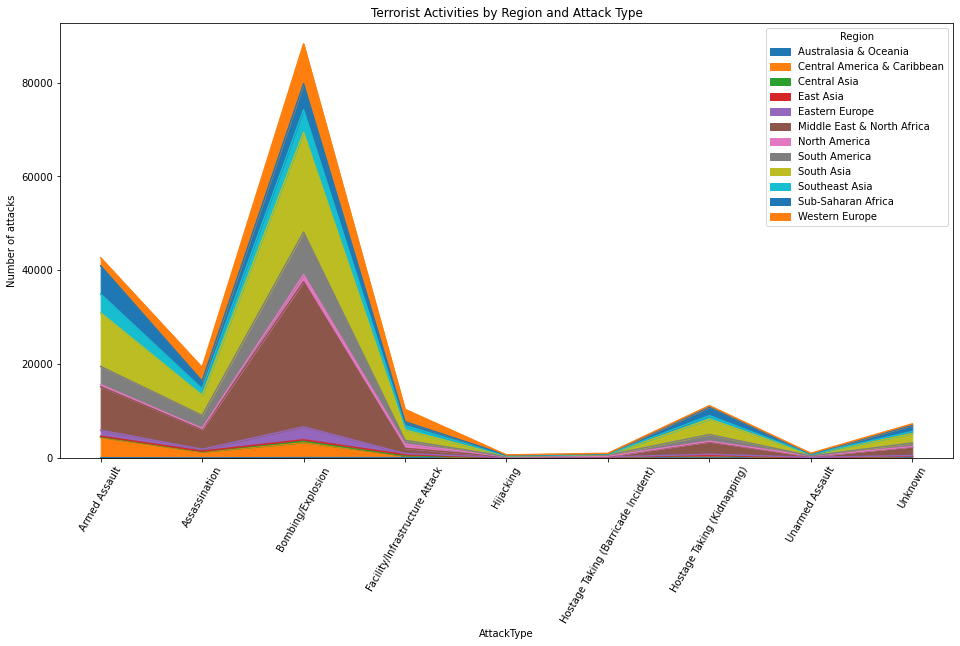

In [48]:
pd.crosstab(df.AttackType, df.Region).plot(kind='area',figsize=(16,8))
plt.title('Terrorist Activities by Region and Attack Type')
plt.ylabel('Number of attacks')
plt.xticks(rotation=60)
plt.show()

### Bombings and Explosions are the most common terrorist activities across all regions

## Most common targets for terrorist activity

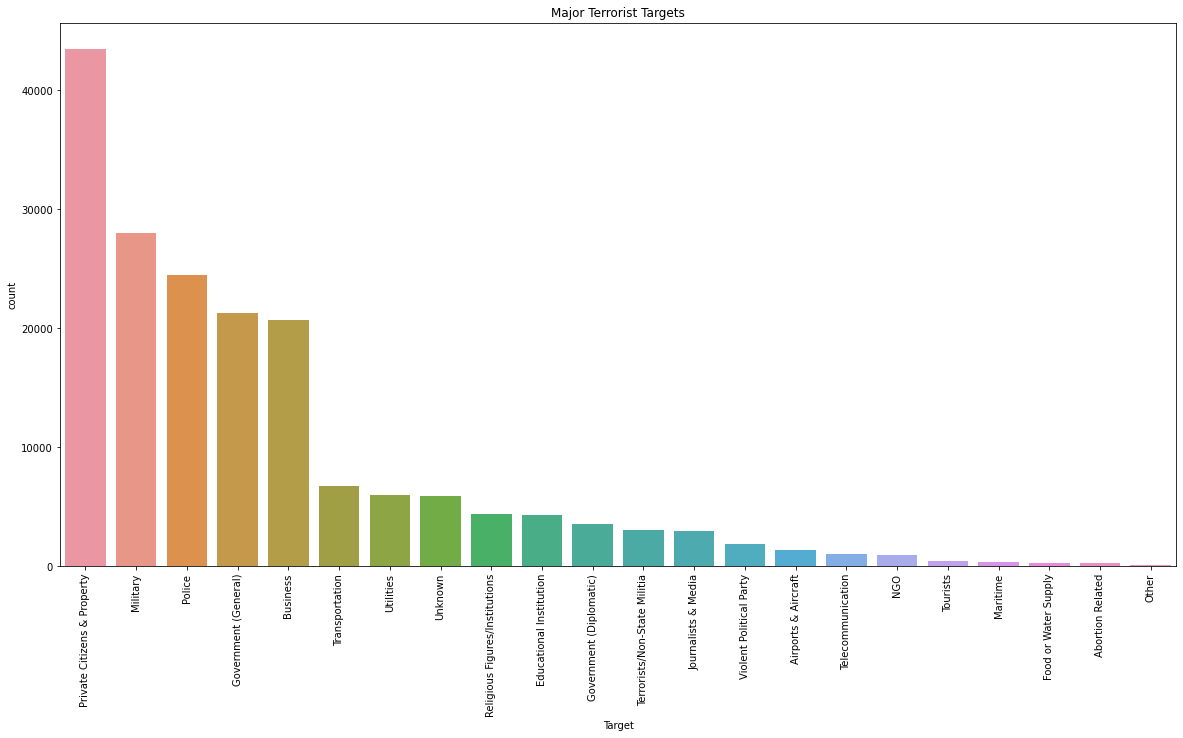

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x="Target", data=df, order = df["Target"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Major Terrorist Targets")
plt.show()

### Private Citizens and Property are the most common target for attacks

## Most active organizations

Most active organizations:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


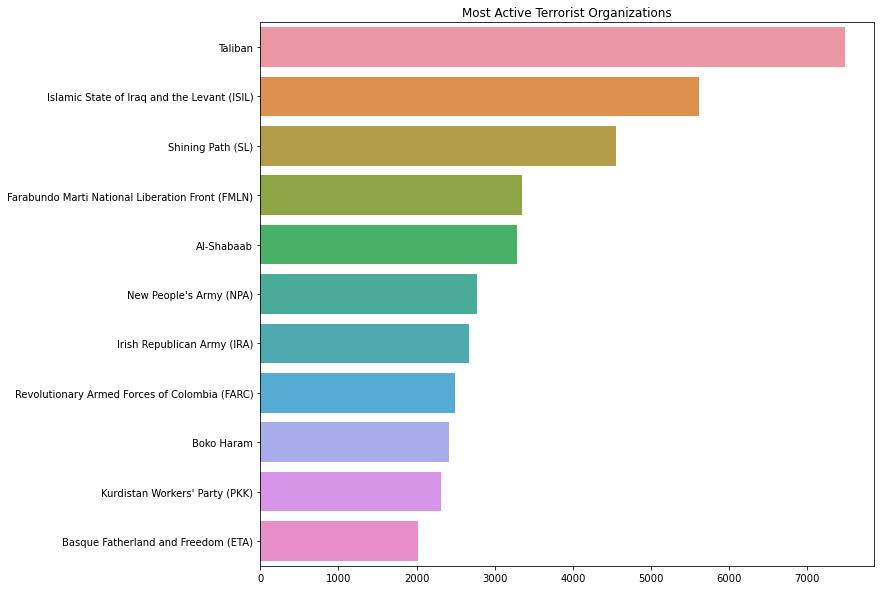

In [57]:
print('Most active organizations:\n',df['Group'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')

plt.show()

## In conclusion:
1. Terrorism has been on the rise since 2011, across all regions of the world, with 2014 seeing the maximum attacks
2. The most heavily affected regions are the Middle East and North Africa, closely followed by South Asia
3. Iraq, Pakistan, Afghanistan and India are the countries most afflicted
4. Baghdad is the most unsafe city in the world, with regards to terrorist attacks
5. The most common attacking method is through bombings and explosions
6. The most common target is Private Citizens and Property
7. The other most common target types are Military, Police, Governments and Businesses
8. The most active organization since the 1970s has been the Taliban 



